# CS 328 Final Project
by: Eva Choudhury, Addie Padhi, Alisha Patil

## Imports Section

In [10]:
import os
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

## Preprocessing Data and Filtering 

In [11]:
WINDOW_SIZE = 2  # in seconds
SAMPLE_RATE = 100  # Hz 
def calc_magnitude(df):
    df['accel_mag'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)
    df['accel_mag'] -= df['accel_mag'].mean()
    return df

def remove_noise(df, sample_rate=SAMPLE_RATE):
    b, a = butter(N=2, Wn=5/(sample_rate/2), btype='low')
    df['filtered_mag'] = filtfilt(b, a, df['accel_mag'])
    return df

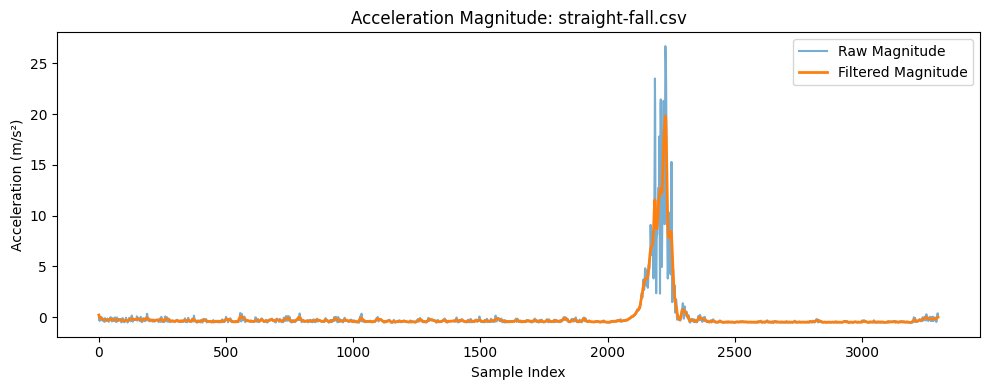

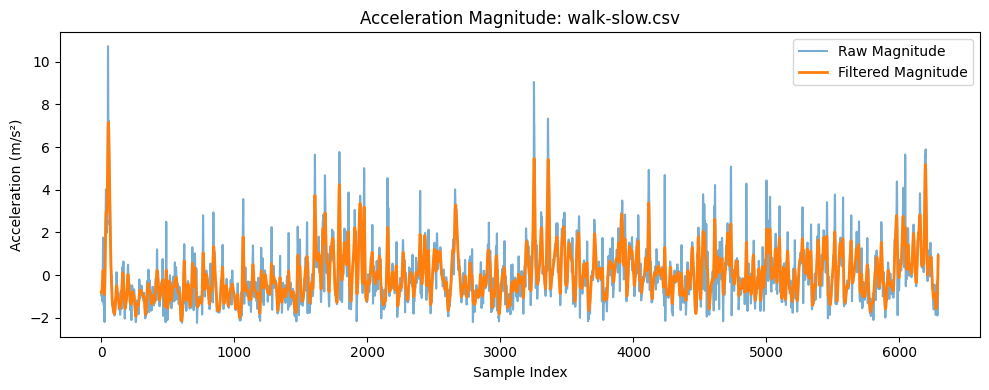

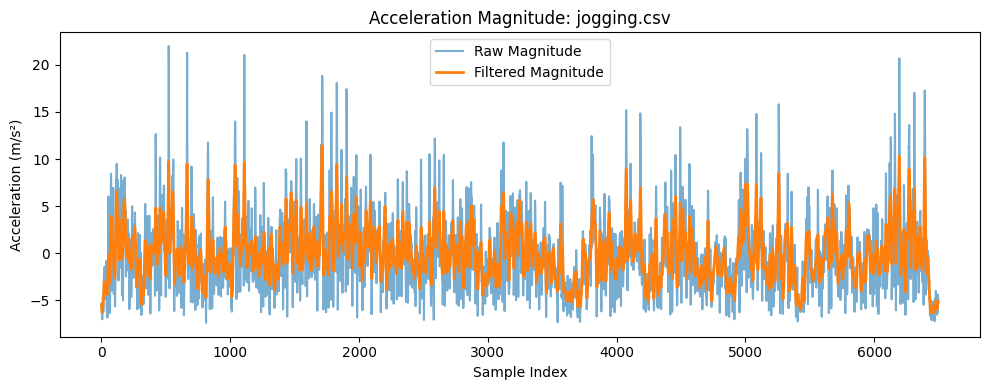

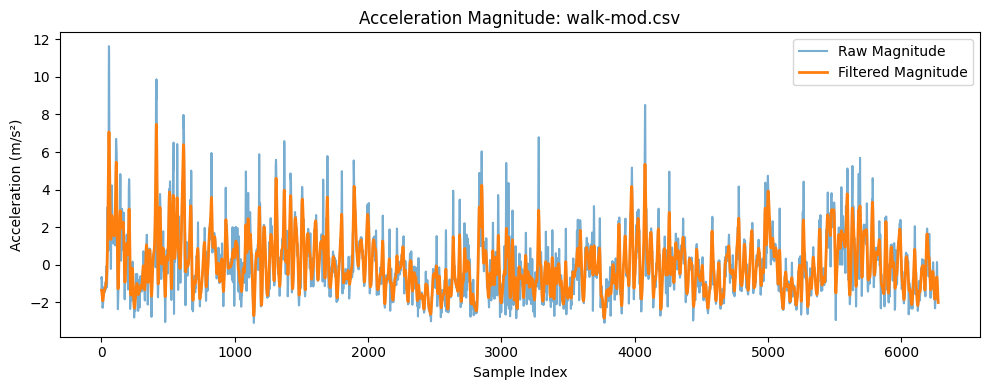

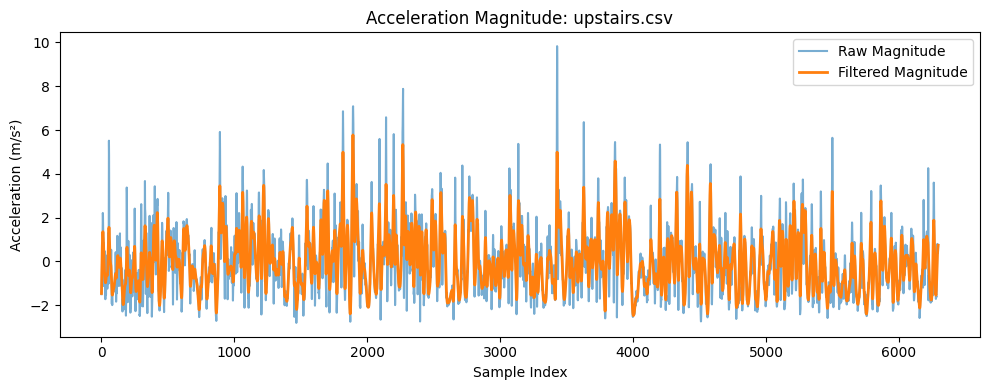

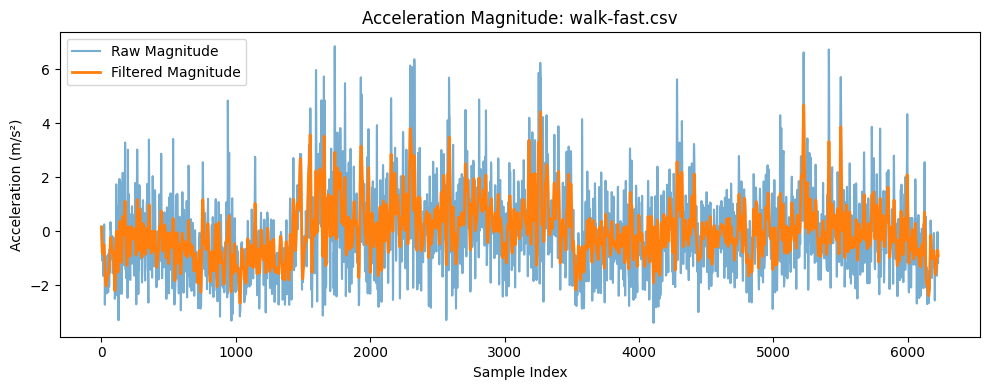

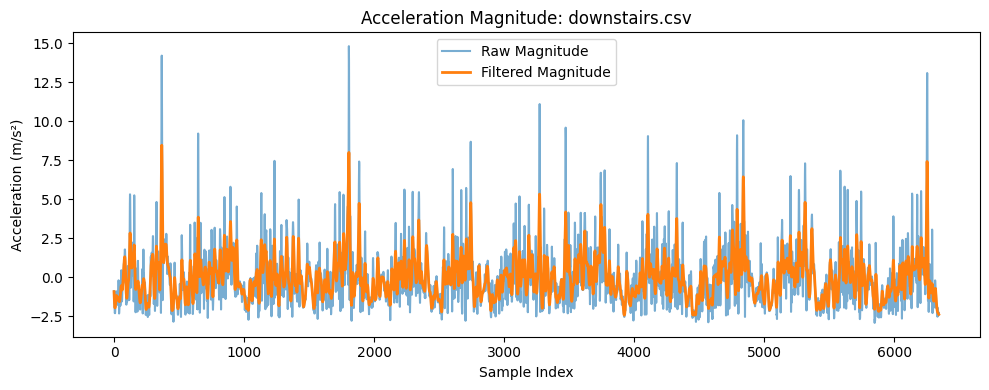

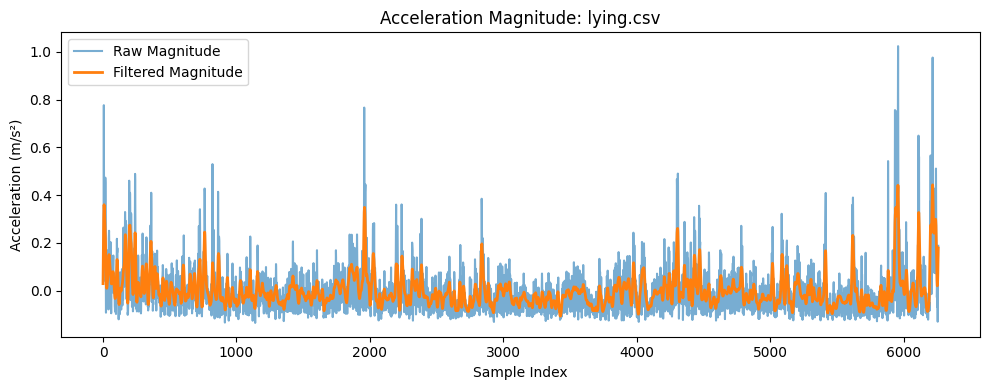

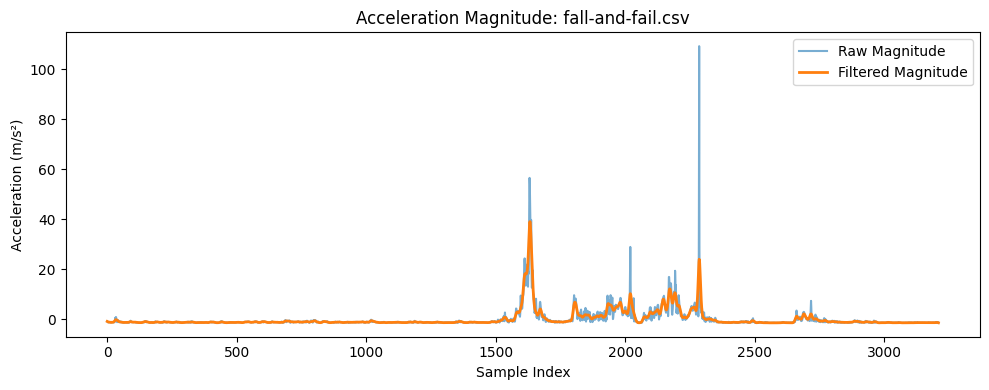

In [12]:
def preprocess_all_files():
    for fname in os.listdir("data"):
        if not fname.endswith(".csv"):
            continue
        path = os.path.join("data", fname)
        df = pd.read_csv(path)
        df = calc_magnitude(df)
        df = remove_noise(df)
        

        plt.figure(figsize=(10, 4))
        plt.plot(df['accel_mag'], label='Raw Magnitude', alpha=0.6)
        plt.plot(df['filtered_mag'], label='Filtered Magnitude', linewidth=2)
        plt.title(f"Acceleration Magnitude: {fname}")
        plt.xlabel("Sample Index")
        plt.ylabel("Acceleration (m/s²)")
        plt.legend()
        plt.tight_layout()
        plt.show()


preprocess_all_files()